<a href="https://colab.research.google.com/github/isoittech/udemy-Hands-on-PyTorch/blob/main/03_MLP%E3%81%AB%E3%82%88%E3%82%8BMNIST%E3%81%AE%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [27]:
transform = transforms.Compose([
    transforms.ToTensor()
])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

In [28]:
num_batches = 100

In [29]:
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [30]:
train_iter = iter(train_dataloader)

In [31]:
imgs, labels = train_iter.next()

In [32]:
imgs.size()

torch.Size([100, 1, 28, 28])

In [33]:
labels

tensor([7, 4, 3, 3, 1, 0, 2, 2, 6, 9, 2, 4, 4, 1, 7, 4, 0, 9, 4, 1, 9, 3, 2, 1,
        1, 5, 7, 4, 8, 8, 6, 8, 0, 7, 1, 9, 4, 9, 4, 2, 1, 6, 4, 3, 7, 3, 6, 1,
        0, 0, 1, 6, 8, 7, 6, 1, 7, 3, 0, 7, 8, 6, 5, 6, 9, 4, 6, 7, 9, 6, 6, 7,
        3, 5, 8, 2, 9, 3, 3, 6, 0, 3, 1, 1, 7, 3, 7, 2, 6, 2, 7, 7, 1, 5, 9, 1,
        2, 2, 6, 5])

In [34]:
img = imgs[0]
img_permute = img.permute(1, 2, 0)

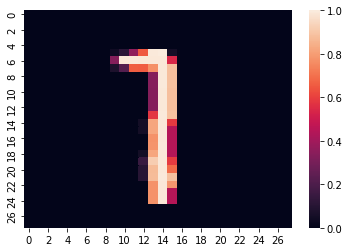

In [35]:
sns.heatmap(img_permute.numpy()[:, :, 0])

In [36]:
labels[0]

tensor(7)

In [37]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28, 400),
            nn.ReLU(inplace=True), # ReLuを実行したあとにもとの配列を置き換える（メモリ節約のため）
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10),
        )
    def forward(self, x):
        output = self.classifier(x)
        return output
        

In [38]:
model = MLP()

In [39]:
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [42]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1) # 0~9（1次元目）の要素のうちの最大の要素番号を返す？
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_dataloader) # 平均を出している
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.3095332986737291, acc: 0.9068682193756104
epoch: 1, loss: 0.10697505920194089, acc: 0.9674170017242432
epoch: 2, loss: 0.0713028261026678, acc: 0.9780828356742859
epoch: 3, loss: 0.05027869685048548, acc: 0.984248161315918
epoch: 4, loss: 0.0383717038493099, acc: 0.9881654977798462
epoch: 5, loss: 0.030900070964513967, acc: 0.9896648526191711
epoch: 6, loss: 0.024822545779218975, acc: 0.991931676864624
epoch: 7, loss: 0.020392936784240496, acc: 0.9933154582977295
epoch: 8, loss: 0.019750088259315818, acc: 0.9935148358345032
epoch: 9, loss: 0.01585252757876636, acc: 0.994598925113678
epoch: 10, loss: 0.015717284771732617, acc: 0.9947315454483032
epoch: 11, loss: 0.014472873473141589, acc: 0.995165228843689
epoch: 12, loss: 0.011432989082592637, acc: 0.9963321089744568
epoch: 13, loss: 0.011689756046580442, acc: 0.9963324069976807
epoch: 14, loss: 0.01156235442080894, acc: 0.9962988495826721


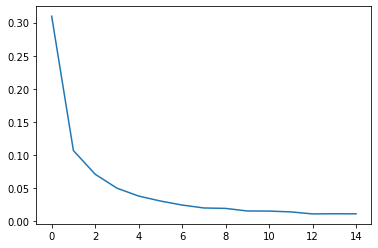

In [43]:
plt.plot(losses)

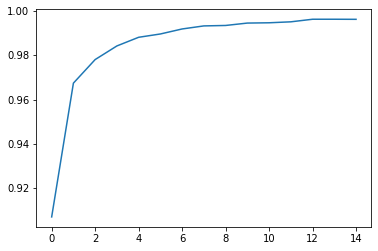

In [44]:
plt.plot(accs)

In [45]:
train_iter = iter(train_dataloader)
imgs, labels = train_iter.next()
labels

tensor([0, 5, 4, 0, 7, 9, 6, 4, 0, 3, 7, 0, 3, 4, 1, 4, 6, 9, 2, 1, 1, 6, 4, 5,
        0, 2, 7, 8, 2, 8, 9, 8, 2, 0, 0, 5, 3, 6, 0, 1, 7, 2, 4, 1, 3, 1, 9, 7,
        2, 6, 7, 1, 5, 0, 4, 6, 6, 2, 9, 2, 9, 8, 5, 8, 9, 8, 4, 0, 3, 2, 7, 6,
        2, 2, 5, 2, 0, 9, 8, 9, 5, 6, 9, 0, 7, 3, 8, 5, 3, 2, 7, 0, 1, 5, 7, 9,
        4, 3, 0, 0])

In [46]:
imgs_gpu = imgs.view(100, -1).to(device)
output = model(imgs_gpu)

In [48]:
pred = torch.argmax(output, dim=1)
pred

tensor([0, 5, 4, 0, 7, 9, 6, 4, 0, 3, 7, 0, 3, 4, 1, 4, 6, 9, 2, 1, 1, 6, 4, 5,
        0, 2, 7, 8, 2, 8, 9, 8, 2, 0, 0, 5, 3, 6, 0, 1, 7, 2, 4, 1, 3, 1, 9, 7,
        2, 6, 7, 1, 5, 0, 4, 6, 6, 2, 9, 2, 9, 8, 5, 8, 9, 8, 4, 0, 3, 2, 7, 6,
        2, 2, 5, 2, 0, 9, 8, 9, 5, 6, 9, 0, 7, 3, 8, 5, 3, 2, 7, 0, 1, 5, 7, 9,
        4, 3, 0, 0], device='cuda:0')

In [49]:
params = model.state_dict()
params

OrderedDict([('classifier.0.weight',
              tensor([[ 0.0028, -0.0049, -0.0203,  ...,  0.0151,  0.0070, -0.0343],
                      [ 0.0276,  0.0226,  0.0176,  ...,  0.0323, -0.0342, -0.0227],
                      [-0.0092,  0.0191, -0.0338,  ..., -0.0327, -0.0194,  0.0187],
                      ...,
                      [ 0.0310,  0.0284,  0.0246,  ...,  0.0294, -0.0309,  0.0075],
                      [ 0.0107, -0.0342,  0.0065,  ..., -0.0187,  0.0234,  0.0287],
                      [-0.0091, -0.0349,  0.0192,  ..., -0.0352,  0.0063, -0.0182]],
                     device='cuda:0')),
             ('classifier.0.bias',
              tensor([ 6.0358e-04, -3.2880e-02,  3.4962e-03,  1.7132e-02, -6.4008e-03,
                       3.4883e-02,  2.3473e-02, -1.1196e-01,  7.7149e-02,  7.9009e-03,
                      -6.7212e-02,  8.4167e-03, -5.7353e-02,  7.6796e-02, -4.3595e-03,
                      -5.0666e-04,  5.9804e-02, -3.3992e-02,  1.8706e-02,  6.8760e-03,
        

In [50]:
torch.save(params, "model.prm")

In [53]:
!ls -alh

total 1.7M
drwxr-xr-x 1 root root 4.0K Dec  2 14:49 .
drwxr-xr-x 1 root root 4.0K Dec  2 14:09 ..
drwxr-xr-x 4 root root 4.0K Nov 18 14:35 .config
drwxr-xr-x 3 root root 4.0K Dec  2 14:20 data
-rw-r--r-- 1 root root 1.6M Dec  2 14:49 model.prm
drwxr-xr-x 1 root root 4.0K Nov 18 14:36 sample_data


In [54]:
param_load = torch.load("model.prm")
model.load_state_dict(param_load)

<All keys matched successfully>